<a href="https://colab.research.google.com/github/ankita1200/Machine-Learning-Topics/blob/main/InsuranceClaims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Type of problem - Classification , number of classes 2
2. problem - predict whether insurance will be claimed or not

Challenge -
- Small dataset
- slightly imbalanceed dataset

Steps -
1. understnad data and data clean up
2. build a classification model to predict whether the insurance will be claimed or not
3. fine-tune hyperparameters and compare performance metrics of various classification models


1. Data Exploration - find total samples and features, # of categorical features, # of numerical features, basic stats
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
data = pd.read_csv("Insurance.csv")

In [ ]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [ ]:
data.shape

(1338, 8)

In [ ]:
# check for imbalance
data['insuranceclaim'].value_counts() / len(data) * 100

,count
insuranceclaim,
1,58.520179
0,41.479821


In [ ]:
# original copy
df = data.copy()

In [ ]:
# seperate target and features
target = ['insuranceclaim']
features = [fea for fea in data.columns if fea not in target]

In [ ]:
features

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [ ]:
# checking data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [ ]:
# Checking the number of distinct categories in a categorical column.
data.nunique().sort_values()

,0
sex,2
smoker,2
insuranceclaim,2
region,4
children,6
age,47
bmi,548
charges,1337


# EDA

In [ ]:
# Analyse distribution of target
classes = sorted(data['insuranceclaim'].unique())
labels = ['Claimed', 'Not Claimed']

In [ ]:
map = {}
for index, label in enumerate(classes):
  map[label] = labels[index]

map

{np.int64(0): 'Claimed', np.int64(1): 'Not Claimed'}

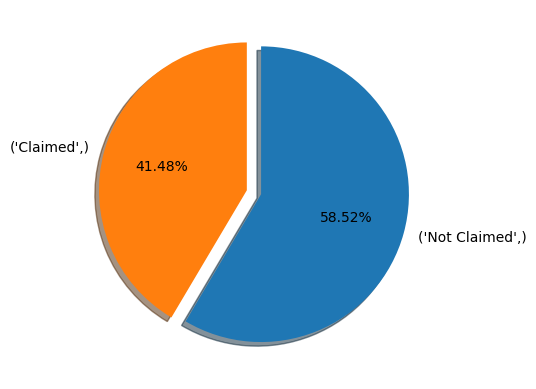

In [ ]:
df1 = data.copy()
df1['insuranceclaim'] = df1['insuranceclaim'].map(map)
plt.pie(df1['insuranceclaim'].value_counts(), labels=df1[target].value_counts().index, autopct='%1.2f%%', startangle=90, counterclock=False, shadow=True, radius=1, explode=[0,0.1])
plt.show()

In [ ]:
# Target is slightly imbalanced. So will perform data augmentation
data[features].nunique().sort_values()

,0
sex,2
smoker,2
region,4
children,6
age,47
bmi,548
charges,1337


In [ ]:
# create a list of categorical and numerical features
cf = []
nu = []
for feature in features:
  if data[feature].nunique() <= 6:
    cf.append(feature)
  else:
    nu.append(feature)
print(cf)
print(nu)

['sex', 'children', 'smoker', 'region']
['age', 'bmi', 'charges']


In [ ]:
data

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


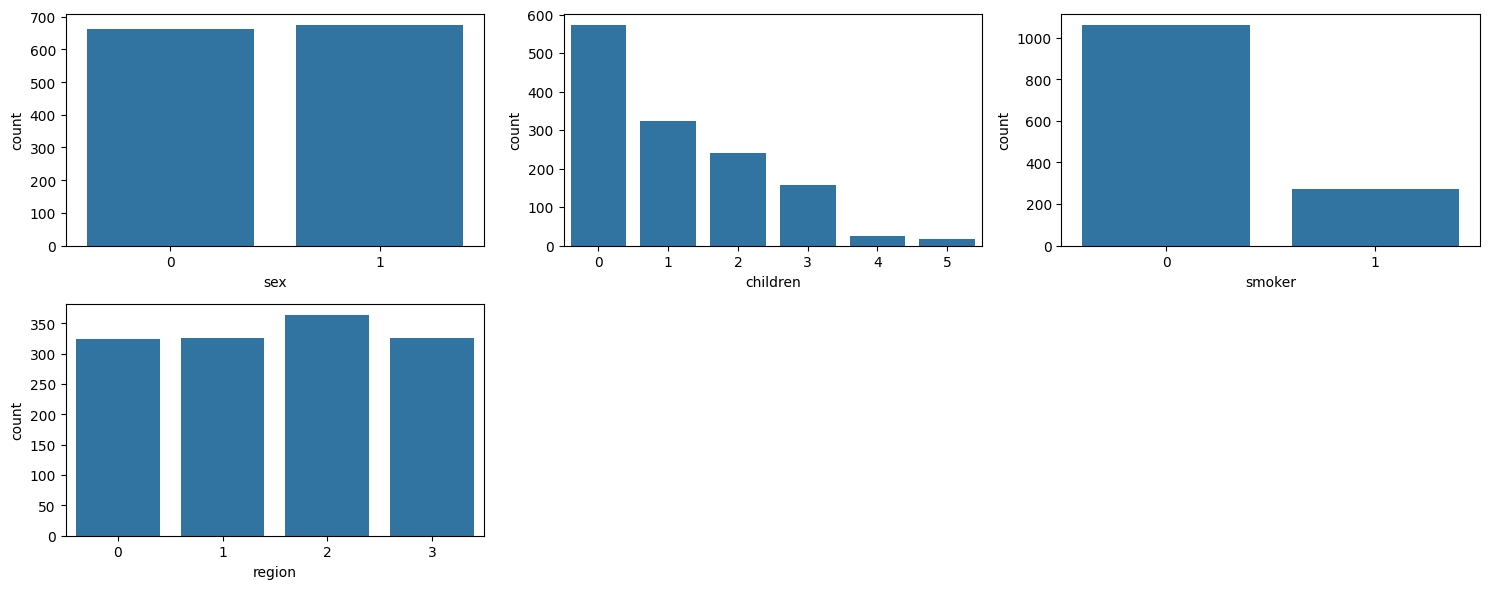

In [ ]:
n=3
plt.figure(figsize=(15, 3 * math.ceil(len(cf) / n)))

for i in range(len(cf)):
    if data[cf[i]].nunique() <= 6:
        plt.subplot(math.ceil(len(cf) / n), n, i + 1)  # Ensuring consistent subplot layout
    else:
        plt.subplot(math.ceil(len(cf) / n), n, i + 1)  # Keep the same layout

    sns.countplot(x=data[cf[i]])  # Fixing incorrect countplot syntax

plt.tight_layout()
plt.show()

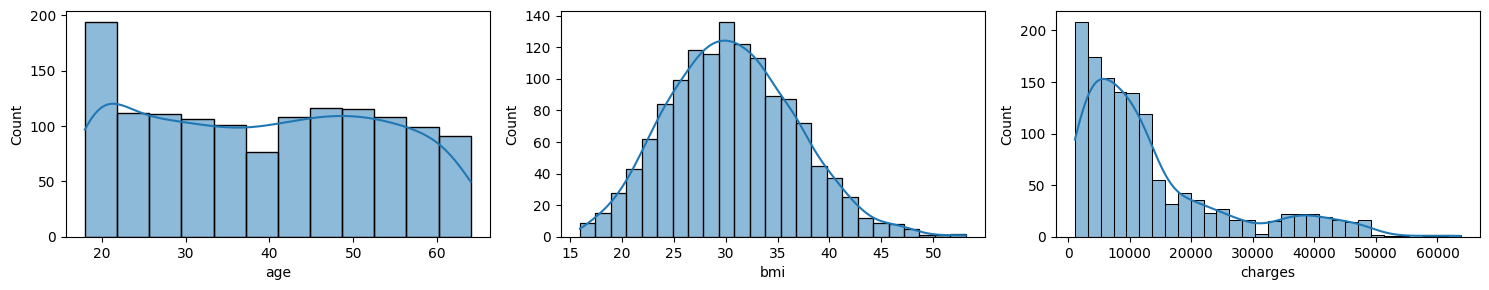

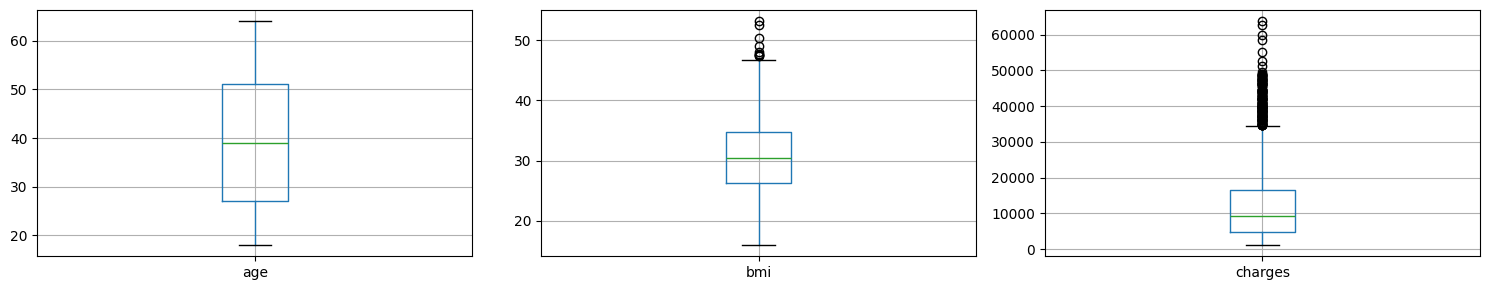

In [ ]:
# Distribution Plots
plt.figure(figsize=(15, 3 * math.ceil(len(nu) / 3)))  # Fixed figsize
for c in range(len(nu)):
    plt.subplot(math.ceil(len(nu) / 3), 3, c + 1)  # Used nf instead of features
    sns.histplot(df[nu[c]], kde=True)  # Replaced deprecated sns.distplot()

plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 3 * math.ceil(len(nu) / 3)))  # Fixed figsize
for c in range(len(nu)):
    plt.subplot(math.ceil(len(nu) / 3), 3, c + 1)  # Used nf instead of features
    df.boxplot(column=[nu[c]])  # Fixed syntax

plt.tight_layout()
plt.show()

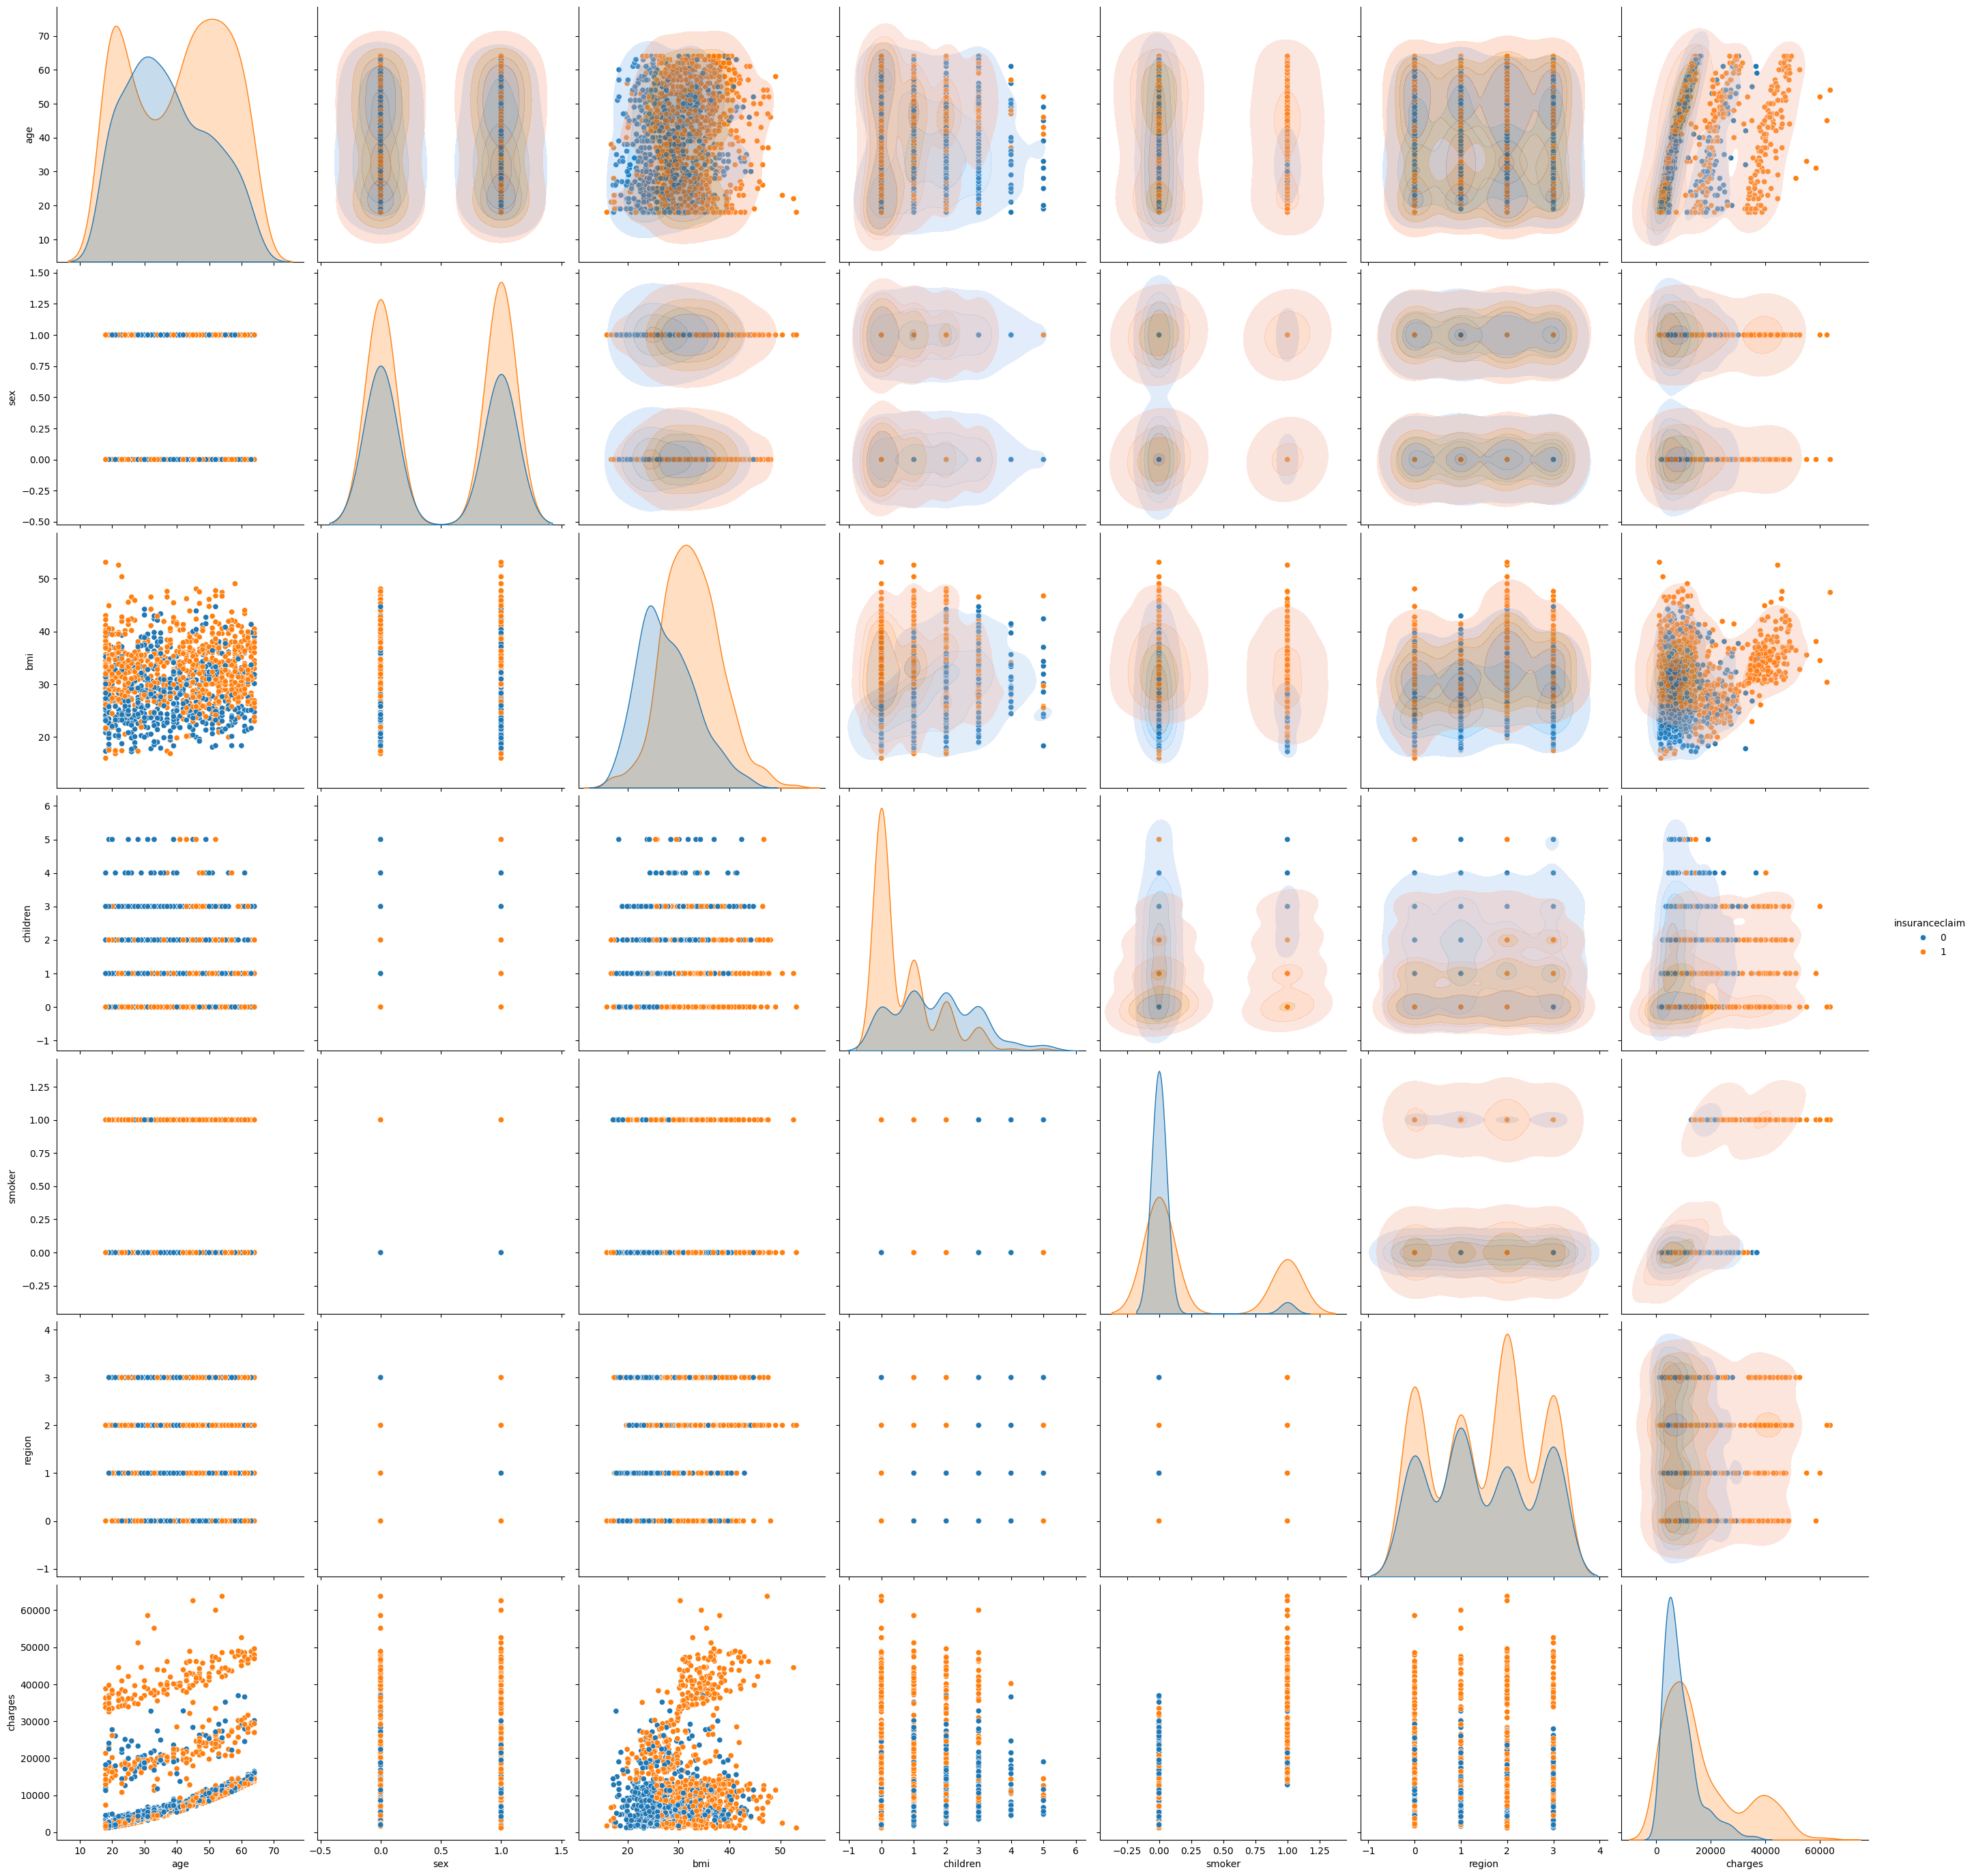

In [ ]:
g = sns.pairplot(data, hue='insuranceclaim', height=4)  # Fixed 'size' → 'height'

# Apply KDE only to the upper triangle
g.map_upper(sns.kdeplot, fill=True, alpha=0.3, levels=5, color=".2")

plt.show()

# Data Preprocessing

In [ ]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)
# drop=True Drops the old index instead of keeping it as a separate column.
data.reset_index(drop=True, inplace=True)

In [ ]:
data.shape

(1337, 8)

In [ ]:
# check for null values
nvc = pd.DataFrame(data.isnull().sum().sort_values(), columns=["Total null values"])
nvc['percentage'] = nvc['Total null values'] / len(data) * 100
nvc

,Total null values,percentage
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0
insuranceclaim,0,0.0


In [ ]:
# Converting categorical features to numeric
data[features].nunique().sort_values()

,0
sex,2
smoker,2
region,4
children,6
age,47
bmi,548
charges,1337


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# sex and smoker: Since they have only two unique values, label encoding is sufficient.
encoder = LabelEncoder()
data["sex"] = encoder.fit_transform(data["sex"])
data["smoker"] = encoder.fit_transform(data["smoker"])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# we drop the first column of one-hot encoded vector, to avoid multicolinearity. This column can be inferred based on other columns
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_feature = one_hot_encoder.fit_transform(data[["region"]])


When using one-hot encoding
1. import one_hot_encoder from sklearn preprocessing
2. instantiate OneHotEncoder followed by using fit_transform to transform the feature. you get multiple columns = cardinality - 1
3. use the onehotencoder object to get the feature names
4. create a dataframe with column names as the feature names and encoded feature
5. use pandas concat to add the new features as columns to the dataframe. Drop the exisiting cat col

In [ ]:
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_feature = one_hot_encoder.fit_transform(data[["region"]])
# Get feature names from the encoder, not the transformed data
feature_names = one_hot_encoder.get_feature_names_out(["region"])
print(feature_names)  # Print or use feature_names as needed
encoded_df = pd.DataFrame(encoded_feature, columns=feature_names)
encoded_data = pd.concat([data.drop(columns=["region"], axis=1), encoded_df], axis=1)
encoded_data.head(7)

['region_1' 'region_2' 'region_3']


,age,sex,bmi,children,smoker,charges,insuranceclaim,region_1,region_2,region_3
0,19,0,27.900,0,1,16884.92400,1,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,1,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,1,1.0,0.0,0.0
5,31,0,25.740,0,0,3756.62160,0,0.0,1.0,0.0
6,46,0,33.440,1,0,8240.58960,1,0.0,1.0,0.0


In [ ]:
one_hot_encoder2 = OneHotEncoder(drop='first', sparse_output=False)
encoded_feature2 = one_hot_encoder2.fit_transform(data[["children"]])
# Get feature names from the encoder, not the transformed data
feature_names2 = one_hot_encoder2.get_feature_names_out(["children"])
print(feature_names2)  # Print or use feature_names as needed
encoded_df2 = pd.DataFrame(encoded_feature2, columns=feature_names2)
encoded_data2 = pd.concat([encoded_data.drop(columns=["children"], axis=1), encoded_df2], axis=1)
encoded_data2.head(7)

['children_1' 'children_2' 'children_3' 'children_4' 'children_5']


,age,sex,bmi,smoker,charges,insuranceclaim,region_1,region_2,region_3,children_1,children_2,children_3,children_4,children_5
0,19,0,27.900,1,16884.92400,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,18,1,33.770,0,1725.55230,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,28,1,33.000,0,4449.46200,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,33,1,22.705,0,21984.47061,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,1,28.880,0,3866.85520,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,31,0,25.740,0,3756.62160,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,46,0,33.440,0,8240.58960,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# outlier detection
# numerical columns
num_col = ["age", "bmi", "charges"]
df4 = encoded_data2.copy()
for col in num_col:
  q1 = df4[col].quantile(0.25)
  q3 = df4[col].quantile(0.75)
  IQR = q3 - q1
  lower_bound = q1 - 1.5*IQR
  upper_bound = q3 + 1.5*IQR
  df4 = df4[(df4[col]>=lower_bound) & (df4[col]<=upper_bound)]
df4.head(5)

,age,sex,bmi,smoker,charges,insuranceclaim,region_1,region_2,region_3,children_1,children_2,children_3,children_4,children_5
0,19,0,27.900,1,16884.92400,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,18,1,33.770,0,1725.55230,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,28,1,33.000,0,4449.46200,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,33,1,22.705,0,21984.47061,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,1,28.880,0,3866.85520,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df4.shape

(1190, 14)

In [ ]:
encoded_data2.shape

(1337, 14)

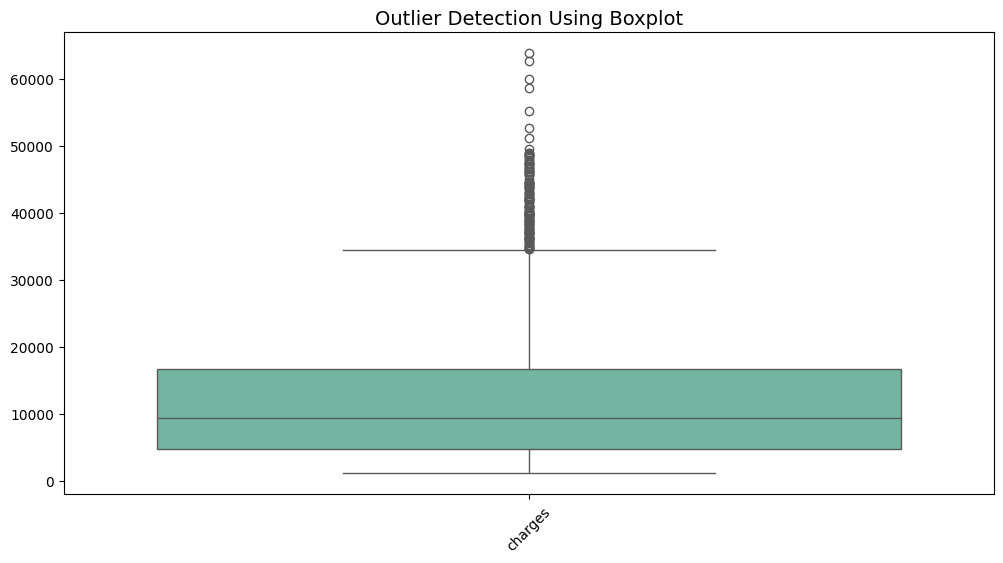

In [ ]:
# Select numerical columns
num_cols = ["charges"]

# Create boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=encoded_data2[num_cols], palette="Set2")
plt.title("Outlier Detection Using Boxplot", fontsize=14)
plt.xticks(rotation=45)
plt.show()


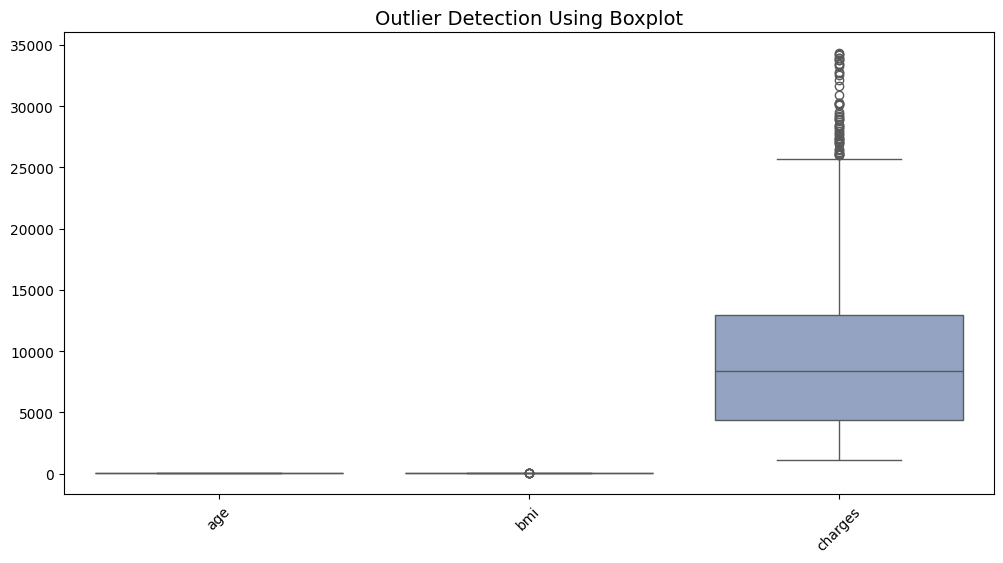

In [ ]:
# Select numerical columns
num_cols = ["age", "bmi", "charges"]

# Create boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df4[num_cols], palette="Set2")
plt.title("Outlier Detection Using Boxplot", fontsize=14)
plt.xticks(rotation=45)
plt.show()


SMOTE - Synthetic Minority oversampling technique
using smote to handle class imbalance. Smote is a powerful technique to handle class imbalance by synthetically generating new minority class samples instead of simply duplicating existing ones.

In [ ]:
!pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
df5 = df4.copy()

In [ ]:
df5[target].value_counts()

,count
insuranceclaim,
1,638
0,552


In [ ]:
X = df5.drop(target, axis=1)
y = df5[target]

In [ ]:
X.shape

(1190, 13)

In [ ]:
cols = X.columns

In [ ]:
y.shape

(1190, 1)

In [ ]:
smote = SMOTE()
X, y = smote.fit_resample(X,y)

df5 = pd.DataFrame(X, columns=cols)
df5[target] = y

In [ ]:
df5.shape

(1276, 14)

In [ ]:
df5[target].value_counts()

,count
insuranceclaim,
0,638
1,638


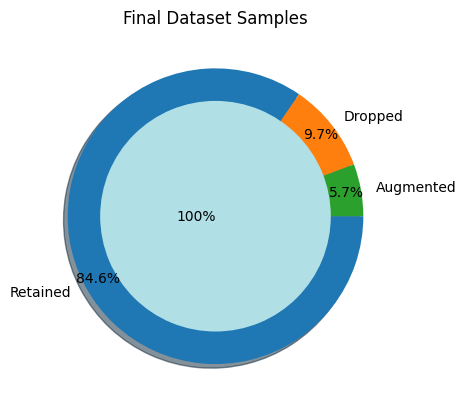


Inference:The final dataset after cleanup has 1276 samples & 14 columns.


In [ ]:
df = df5.copy()
plt.title('Final Dataset Samples')
plt.pie([df.shape[0], data.shape[0]-df4.shape[0], df5.shape[0]-df4.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} columns.'.format(df.shape[0], df.shape[1]))

## Data Manipulation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
cols = X.columns
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns=cols)


In [ ]:
X_test_std = std_scaler.fit_transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=cols)

# Feature Selection

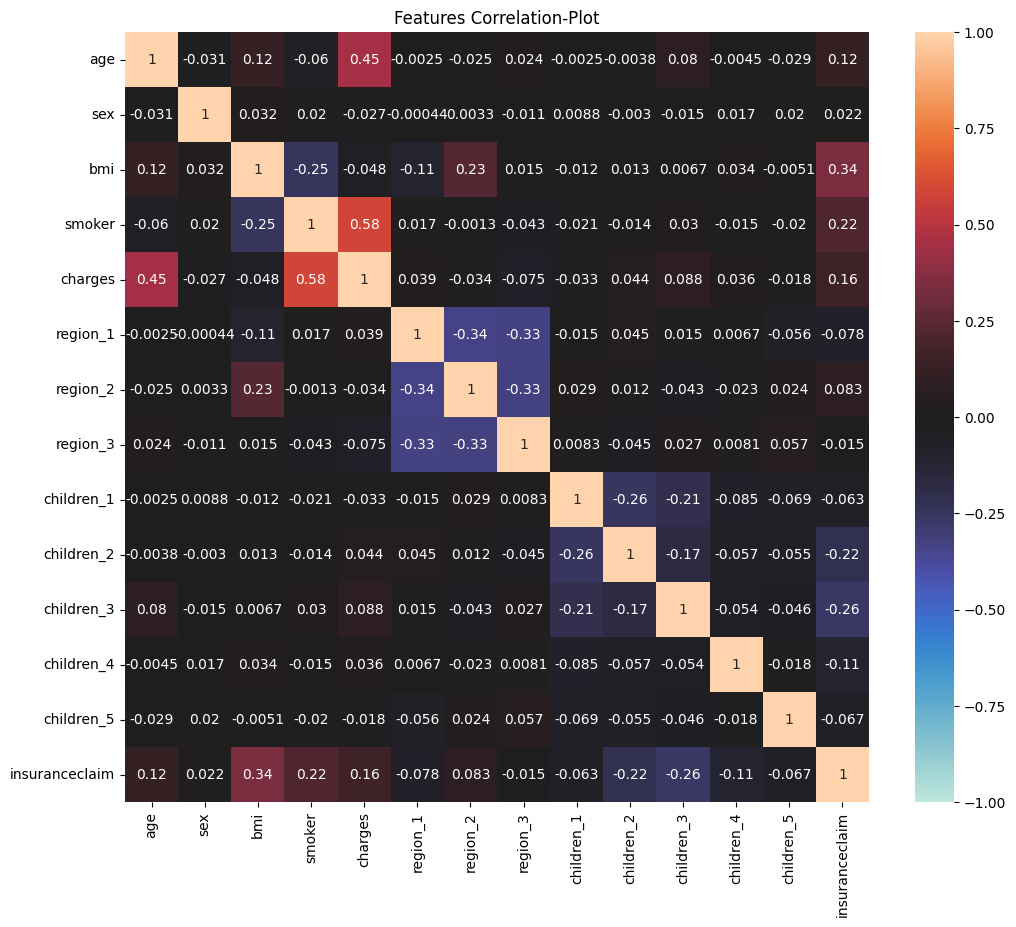

In [ ]:
# checking the correlation
features = df.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
feature_corr = df[features].corr()
sns.heatmap(feature_corr, vmin=-1, vmax=1, center=0, annot=True) #,
plt.show()

1. A correlation matrix heatmap helps identify multicollinearity.

Steps to Identify Multicollinearity
* Compute the correlation matrix of the dataset.
* Plot the heatmap using Seaborn.
* Look for high correlation values (close to +1 or -1) between independent variables.








How to Interpret the Heatmap?
Strong Positive Correlation (Close to +1.0): Two variables increase together (e.g., X1 and X3 may be redundant).

Strong Negative Correlation (Close to -1.0): One variable increases while the other decreases.

No Correlation (Close to 0): Variables are independent.



## Potential multicollinearity exists if:You see high correlation (>|0.85|) between independent variables.

✔ Use Variance Inflation Factor (VIF) to confirm multicollinearity.
✔ Remove or combine highly correlated variables.
✔ Apply Principal Component Analysis (PCA) to reduce dimensionality.



In [ ]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
X_train_std.columns

Index(['age', 'sex', 'bmi', 'smoker', 'charges', 'region_1', 'region_2',
       'region_3', 'children_1', 'children_2', 'children_3', 'children_4',
       'children_5'],
      dtype='object')

In [ ]:
X_train_std.values

array([[ 7.27092016e-01, -9.37258256e-01,  2.35548628e-03, ...,
        -3.86944624e-01, -1.55333368e-01, -1.27001113e-01],
       [-1.48588802e+00, -9.37258256e-01, -9.91733001e-01, ...,
        -3.86944624e-01, -1.55333368e-01, -1.27001113e-01],
       [ 1.56000395e-01,  1.06694179e+00, -1.89306819e-01, ...,
        -3.86944624e-01, -1.55333368e-01, -1.27001113e-01],
       ...,
       [ 4.41546206e-01,  1.06694179e+00, -4.10783260e-01, ...,
         2.69007850e+00, -1.55333368e-01, -1.27001113e-01],
       [ 3.70159753e-01,  1.06694179e+00, -7.74515723e-01, ...,
        -3.86944624e-01, -1.55333368e-01, -1.27001113e-01],
       [ 1.79788881e+00,  1.06694179e+00, -1.04795394e+00, ...,
        -3.86944624e-01, -1.55333368e-01, -1.27001113e-01]])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
import numpy as np
from tqdm import tqdm

In [ ]:
def calculate_vif(dataframe):
  vif_data = pd.DataFrame()
  vif_data["feature"] = dataframe.columns
  vif_data["vif"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
  return vif_data.sort_values(by="vif", ascending=False)

In [ ]:
def evaluate_models(X_train, X_test, y_train, y_test):
  models = {
      "LR" : LogisticRegression(),
      "RFC" : RandomForestClassifier(),
      "XGB" : XGBClassifier(eval_metric="logloss")
  }
  scores = {}
  for name,model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores[name] = f1_score(y_test, pred, average="weighted") * 100
  return scores

In [ ]:

THRESHOLD = 5
drop_features = []
df_numeric = X_train_std.select_dtypes(include=[np.number])
X_train_std2 = X_train_std.copy()
X_test_std2 = X_test_std.copy()
y_train2 = y_train.copy()
y_test2 = y_test.copy()

model_scores = {"LR":[], "RFC":[], "XGB":[]}

for _ in tqdm(range(X_train_std.shape[1])):
  vif_data = calculate_vif(X_train_std)
  drop_feature = vif_data["feature"].iloc[0]
  drop_features.append(drop_feature)
  scores = evaluate_models(
      X_train_std.drop(columns=drop_features, axis=1),
      X_test_std.drop(columns=drop_features, axis=1),
      y_train,
      y_test
  )
  for model in model_scores:
    model_scores[model].append(scores[model])


  0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
  8%|▊         | 1/13 [00:00<00:05,  2.05it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d a

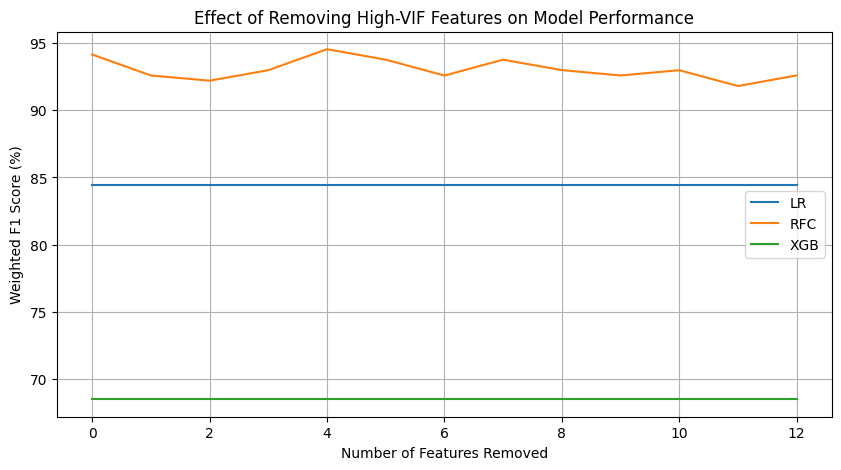

In [ ]:
# Plot performance trend
plt.figure(figsize=(10, 5))
for model, scores in model_scores.items():
    plt.plot(scores, label=model)

plt.xlabel("Number of Features Removed")
plt.ylabel("Weighted F1 Score (%)")
plt.title("Effect of Removing High-VIF Features on Model Performance")
plt.legend()
plt.grid()
plt.show()

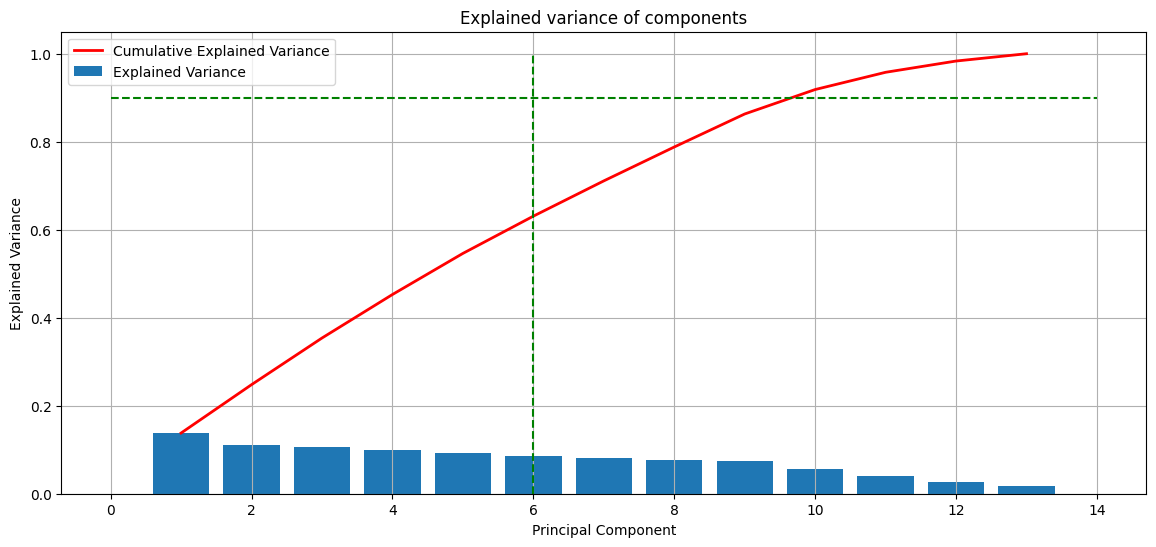

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_std)

fig, ax = plt.subplots(figsize=(14,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.90,0.90],'g--')
plt.plot([6,6],[0,1], 'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.grid()
plt.legend()
plt.show()